In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(f"The shape of Train data is {train_data.shape} that for Test data is {test_data.shape}")

The shape of Train data is (891, 12) that for Test data is (418, 11)


## Here we need to use the passengerID as Index so that it serves as a Unique Idetification number for every data 

In [6]:
train_df = train_data.set_index(train_data['PassengerId']).drop('PassengerId',axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df = test_data.set_index(test_data['PassengerId']).drop('PassengerId',axis = 1)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
for col in train_data.columns :
    if (len(train_data[col].unique()) < 10):
        print(col)
        print(train_data[col].value_counts(),"\n\n")
    else:
        print(col)
        print(f"{len(train_data[col].unique())} unique values in the feature \n")

PassengerId
891 unique values in the feature 

Survived
0    549
1    342
Name: Survived, dtype: int64 


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64 


Name
891 unique values in the feature 

Sex
male      577
female    314
Name: Sex, dtype: int64 


Age
89 unique values in the feature 

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 


Ticket
681 unique values in the feature 

Fare
248 unique values in the feature 

Cabin
148 unique values in the feature 

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64 




## EDA 

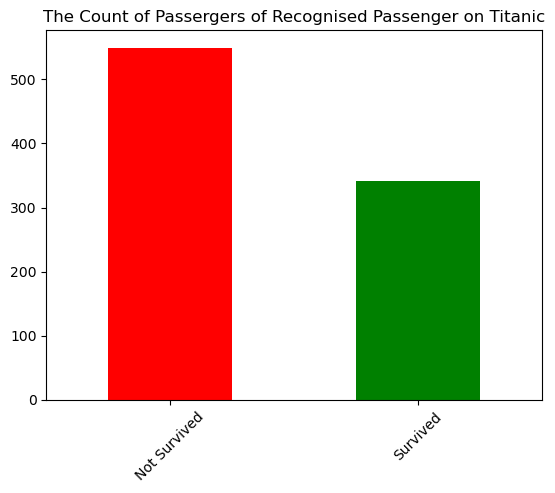

In [11]:
train_data['Survived'].value_counts().plot(kind='bar',color= ['r','g'])
plt.title("The Count of Passergers of Recognised Passenger on Titanic")
plt.xticks([0,1],labels=['Not Survived','Survived'],rotation=45)
plt.show()

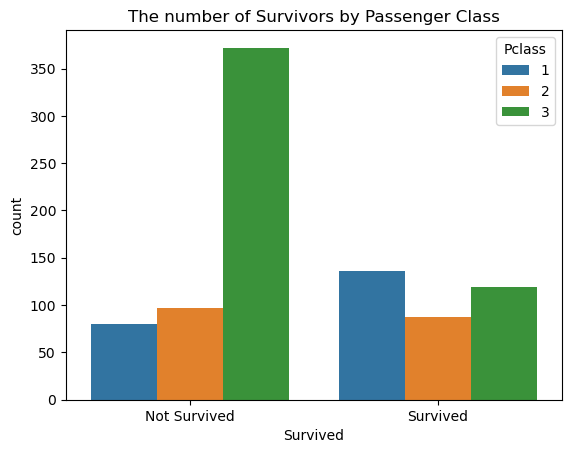

In [12]:
sns.countplot(data=train_data,x='Survived',hue='Pclass')
plt.title("The number of Survivors by Passenger Class")
plt.xticks([0,1],labels=["Not Survived","Survived"])
plt.show()

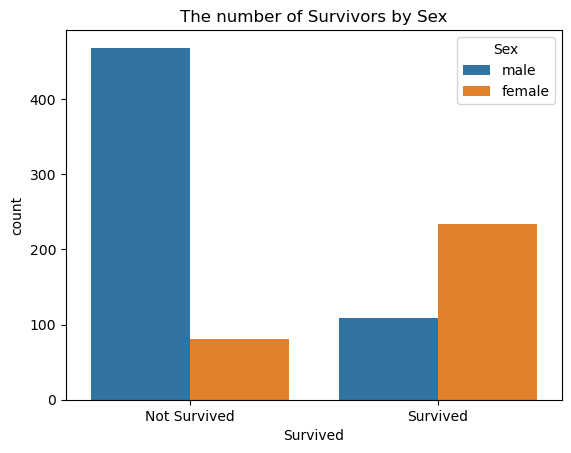

In [13]:
sns.countplot(data=train_data,x='Survived',hue='Sex')
plt.title("The number of Survivors by Sex")
plt.xticks([0,1],labels=["Not Survived","Survived"])
plt.show()

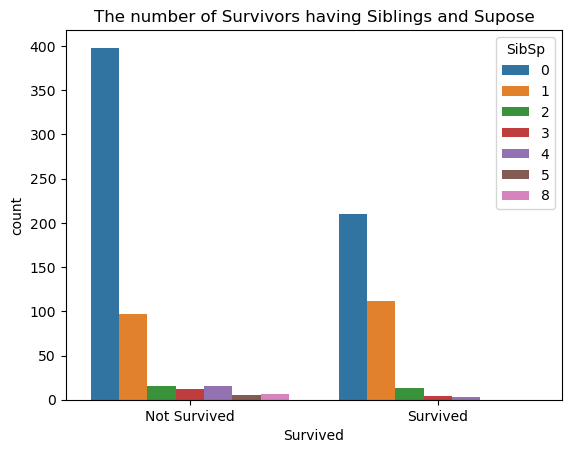

In [14]:
sns.countplot(data=train_data,x='Survived',hue='SibSp')
plt.title("The number of Survivors having Siblings and Supose")
plt.xticks([0,1],labels=["Not Survived","Survived"])
plt.show()

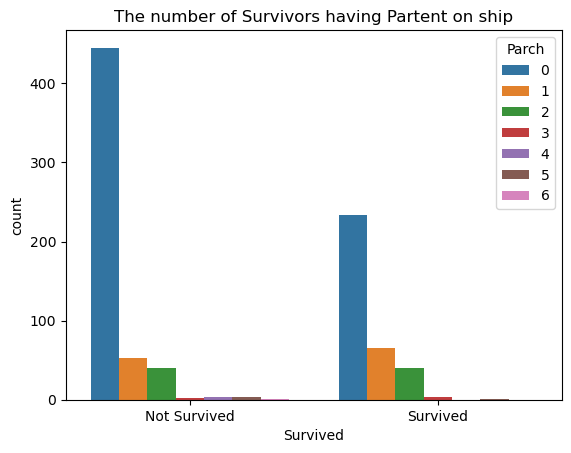

In [15]:
sns.countplot(data=train_data,x='Survived',hue='Parch')
plt.title("The number of Survivors having Partent on ship")
plt.xticks([0,1],labels=["Not Survived","Survived"])
plt.show()

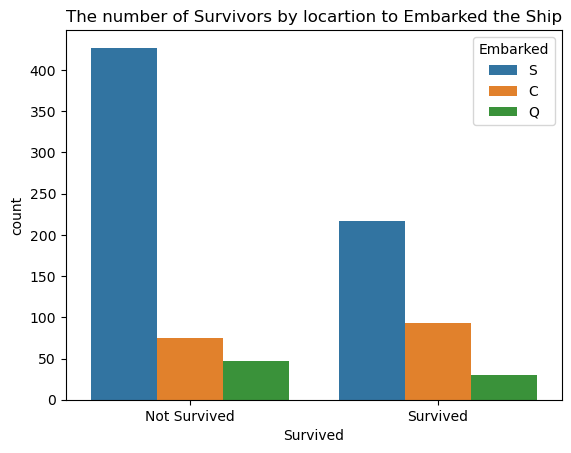

In [16]:
sns.countplot(data=train_data,x='Survived',hue='Embarked')
plt.title("The number of Survivors by locartion to Embarked the Ship")
plt.xticks([0,1],labels=["Not Survived","Survived"])
plt.show()